wlcstat - Statistics Package for the Wormlike Chain Model
===============================================

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wlcstat.wlcave as wlcave
import wlcstat.wlcgreen as wlcgreen
#from wlcstat.wlcave import *
#from wlcstat.wlcgreen import *

Demonstrate functions within the 'wlcave' module

In [2]:
import importlib
importlib.reload(wlcave)
importlib.reload(wlcgreen)

<module 'wlcstat.wlcgreen' from '/Users/ajspakow/Documents/Simulation/spakowitz/github/wlcstat/wlcstat/wlcgreen.py'>

Example usage of the 'r2_ave' function within 'wlcave' module

In [3]:
num_pts = 100
length_kuhn_0 = 1e-3
length_kuhn_f = 1e3
length_kuhn = np.logspace(np.log10(length_kuhn_0), np.log10(length_kuhn_f), num_pts)
dimensions = 3
r2 = wlcave.r2_ave(length_kuhn, dimensions)
r2short = length_kuhn ** 2
r2long = length_kuhn * 2 / (dimensions - 1)

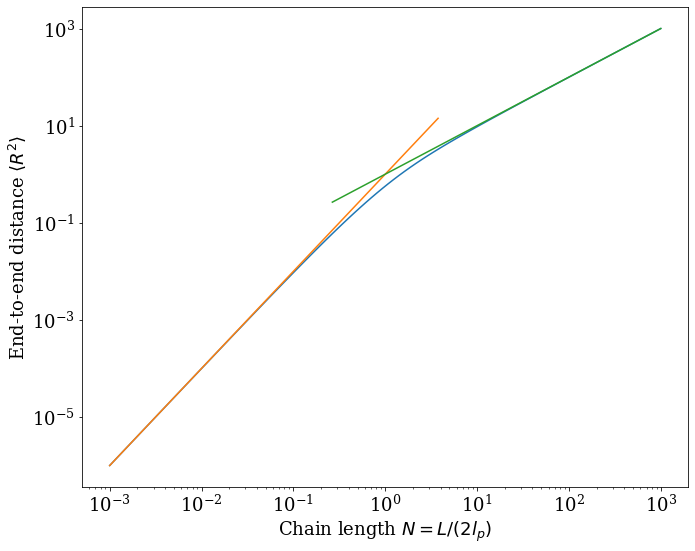

In [4]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
plt.loglog(length_kuhn, r2)
plt.loglog(length_kuhn[0:60], r2short[0:60])        # Short length asymptotic solution
plt.loglog(length_kuhn[40:100], r2long[40:100]) # Long length asymptotic solution
plt.xlabel(r'Chain length $N = L/(2l_{p})$')
plt.ylabel(r'End-to-end distance $\langle R^{2} \rangle$')
plt.tight_layout()
plt.show()

Example usage of the 'rg2_ave' function within 'wlcave' module

In [5]:
num_pts = 100
length_kuhn_0 = 1e-3
length_kuhn_f = 1e3
length_kuhn = np.logspace(np.log10(length_kuhn_0), np.log10(length_kuhn_f), num_pts)
dimensions = 3
rg2 = wlcave.rg2_ave(length_kuhn, dimensions)
rg2short = length_kuhn ** 2 / 12
rg2long = length_kuhn / (3 * (dimensions - 1))

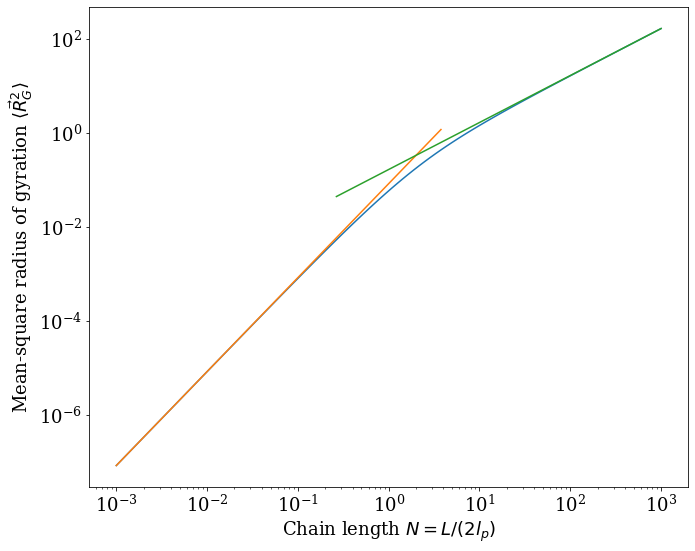

In [6]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
plt.loglog(length_kuhn, rg2)
plt.loglog(length_kuhn[0:60], rg2short[0:60])        # Short length asymptotic solution
plt.loglog(length_kuhn[40:100], rg2long[40:100]) # Long length asymptotic solution
plt.xlabel(r'Chain length $N = L/(2l_{p})$')
plt.ylabel(r'Mean-square radius of gyration $\langle \vec{R}_{G}^{2} \rangle$')
plt.tight_layout()
plt.show()

Example usage of 'rz4_ave' function within 'wlcave' module

In [7]:
num_pts = 100
length_kuhn_0 = 1e-3
length_kuhn_f = 1e3
length_kuhn = np.logspace(np.log10(length_kuhn_0), np.log10(length_kuhn_f), num_pts)
dimensions = 3
rz4 = wlcave.rz4_ave(length_kuhn, dimensions)
rz4short = length_kuhn ** 4 * 3 / (dimensions * (dimensions + 2))
rz4long = length_kuhn ** 2 * 12 / (dimensions * (dimensions - 1)) ** 2

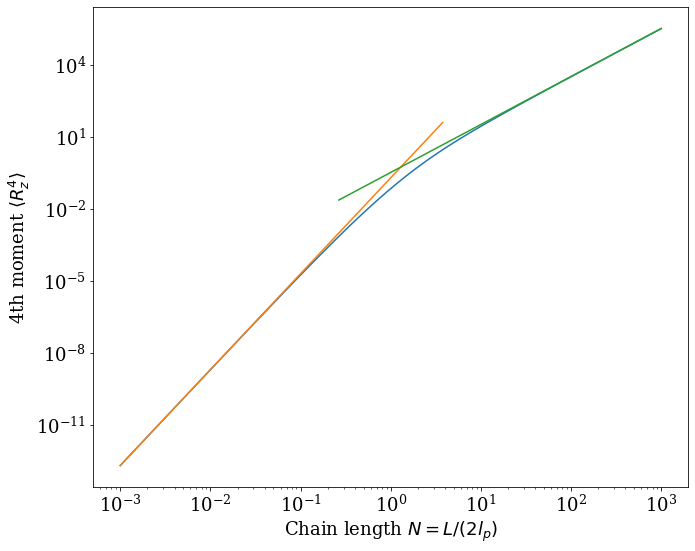

In [8]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
plt.loglog(length_kuhn, rz4)
plt.loglog(length_kuhn[0:60], rz4short[0:60])        # Short length asymptotic solution
plt.loglog(length_kuhn[40:100], rz4long[40:100]) # Long length asymptotic solution
plt.xlabel(r'Chain length $N = L/(2l_{p})$')
plt.ylabel(r'4th moment $\langle R_{z}^{4} \rangle$')
plt.tight_layout()
plt.show()

Example usage of 'eval_poles_and_residues' function within 'wlcgreen' module

In [5]:
num_k = 100
k_val_0 = 1e-2
k_val_f = 1e4
k_val = np.logspace(np.log10(k_val_0), np.log10(k_val_f), num_k)
mu=0
dimensions = 5

num_poles = min(8, 26-mu)
poles = np.zeros((num_k, num_poles), dtype=type(1 + 1j))

for i_k_val in range(num_k):
    poles_k_val, resi_k_val = wlcgreen.eval_poles_and_residues(k_val[i_k_val],mu,dimensions)
    for i_pole in range(num_poles):
        poles[i_k_val, i_pole] = poles_k_val[i_pole]

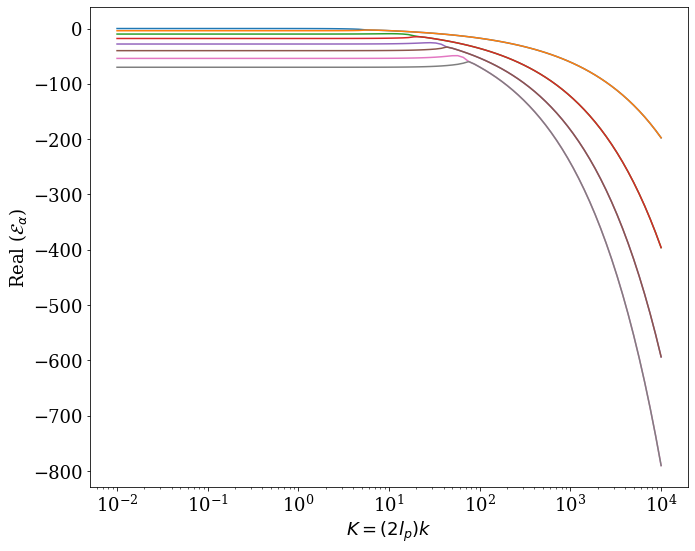

In [6]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for i_pole in range(num_poles):
    plt.semilogx(k_val, np.real(poles[:, i_pole]))
    
plt.xlabel(r'$K = (2l_{p}) k$')
plt.ylabel(r'Real ($\mathcal{E}_{\alpha}$)')
plt.tight_layout()
plt.show()

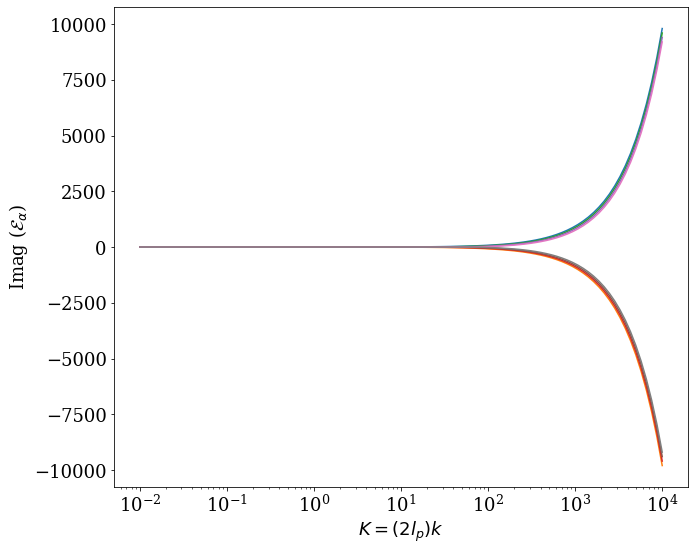

In [19]:
plt.figure(figsize=(10,8))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for i_pole in range(num_poles):
    plt.semilogx(k_val, np.imag(poles[:, i_pole]))

plt.xlabel(r'$K = (2l_{p}) k$')
plt.ylabel(r'Imag ($\mathcal{E}_{\alpha}$)')
plt.tight_layout()
plt.show()